### Loading data from csv to database

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import os
pd.set_option('display.max_columns', None)

In [2]:
# conn = pyodbc.connect('Driver={SQL Server};'
#                       'Server=DESKTOP-QEE21EV;'
#                       'Database=Airbnb_db_test;'
#                       'Trusted_Connection=yes;')
# cursor = conn.cursor()

In [3]:
# cursor.execute('CREATE TABLE Listings_skrypt ( \
#                id int, \
#                listing_url nvarchar(MAX),  \
#                 scrape_id float, \
#                last_scraped  nvarchar(MAX), \
#                name nvarchar(MAX), \
#                description nvarchar(MAX), \
#                neighborhood_overview nvarchar(MAX),\
#                picture_url nvarchar(MAX), \
#                host_id int, \
#                host_url nvarchar(MAX), \
#                host_name nvarchar(MAX), \
#                host_since  nvarchar(MAX), \
#                host_location nvarchar(MAX), \
#                host_about nvarchar(MAX), \
#                host_response_time nvarchar(MAX), \
#                host_response_rate nvarchar(MAX), \
#                host_acceptance_rate nvarchar(MAX), \
#                host_is_superhost nvarchar(MAX), \
#                host_thumbnail_url nvarchar(MAX), \
#                host_picture_url nvarchar(MAX), \
#                host_neighbourhood nvarchar(MAX), \
#                host_listings_count  nvarchar(MAX), \
#                host_total_listings_count  nvarchar(MAX), \
#                host_verifications nvarchar(MAX), \
#                host_has_profile_pic nvarchar(MAX), \
#                host_identity_verified  nvarchar(MAX), \
#                neighbourhood nvarchar(MAX),\
#                neighbourhood_cleansed nvarchar(MAX), \
#                neighbourhood_group_cleansed nvarchar(MAX), \
#                latitude nvarchar(MAX), \
#                longitude nvarchar(MAX), \
#                property_type nvarchar(MAX), \
#                room_type  nvarchar(MAX), \
#                accommodates nvarchar(MAX) , \
#                bathrooms nvarchar(MAX), \
#                bathrooms_text nvarchar(MAX), \
#                bedrooms nvarchar(MAX), \
#                beds nvarchar(MAX), \
#                amenities nvarchar(MAX), \
#                price nvarchar(MAX), \
#                minimum_nights  nvarchar(MAX), \
#                maximum_nights int, \
#                minimum_minimum_nights nvarchar(MAX), \
#                maximum_minimum_nights nvarchar(MAX), \
#                minimum_maximum_nights int , \
#                maximum_maximum_nights int, \
#                minimum_nights_avg_ntm nvarchar(MAX), \
#                maximum_nights_avg_ntm nvarchar(MAX), \
#                calendar_updated nvarchar(MAX), \
#                has_availability  nvarchar(MAX), \
#                availability_30  nvarchar(MAX) , \
#                availability_60  nvarchar(MAX), \
#                availability_90  nvarchar(MAX), \
#                availability_365  nvarchar(MAX), \
#                calendar_last_scraped  nvarchar(MAX), \
#                number_of_reviews  nvarchar(MAX), \
#                number_of_reviews_ltm  nvarchar(MAX), \
#                number_of_reviews_l30d  nvarchar(MAX), \
#                first_review  nvarchar(MAX), \
#                last_review  nvarchar(MAX), \
#                review_scores_rating  nvarchar(MAX), \
#                review_scores_accuracy   nvarchar(MAX), \
#                review_scores_cleanliness   nvarchar(MAX), \
#                review_scores_checkin   nvarchar(MAX), \
#                review_scores_communication  nvarchar(MAX), \
#                review_scores_location  nvarchar(MAX), \
#                review_scores_value  nvarchar(MAX), \
#                license nvarchar(MAX), \
#                instant_bookable  nvarchar(MAX), \
#                calculated_host_listings_count  nvarchar(MAX) , \
#                calculated_host_listings_count_entire_homes  nvarchar(MAX), \
#                calculated_host_listings_count_private_rooms  nvarchar(MAX), \
#                calculated_host_listings_count_shared_rooms nvarchar(MAX), \
#                reviews_per_month nvarchar(MAX))')

In [4]:
# conn.commit()

In [2]:
data = pd.read_csv (f'airbnb_csv/Barcelona, Catalonia, Spain.csv')
city_df = pd.DataFrame(data)
df=pd.DataFrame(columns=city_df.columns)

In [3]:
for file in os.listdir('airbnb_csv'):
    string=file.split(".")[0]
    string_split=string.split(", ")  

    data = pd.read_csv(f'airbnb_csv/{file}')
    city_df = pd.DataFrame(data)
    city_df['city']=string_split[0]
    city_df['region']=string_split[1]
    city_df['country']=string_split[2]
    df=pd.concat([df, city_df], axis=0)


C:\Users\agama\anaconda3\envs\env_miowad\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_copy=df.copy()

In [162]:
#df=df_copy.copy()

### INSERT DATA

In [17]:
# for row in df.itertuples():
#     cursor.execute('''
#                 INSERT INTO Listings_skrypt
#                 VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?, \
#                 ?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
#                 ''',
#                  row.id, row.listing_url, row.scrape_id, row.last_scraped,
#                  row.name, row.description, row.neighborhood_overview,
#                  row.picture_url, row.host_id, row.host_url,
#                  row.host_name, row.host_since, row.host_location, row.host_about,
#                  row.host_response_time, row.host_response_rate, row.host_acceptance_rate,
#                  row.host_is_superhost, row.host_thumbnail_url, row.host_picture_url,
#                  row.host_neighbourhood, row.host_listings_count,
#                  row.host_total_listings_count, row.host_verifications,
#                  row.host_has_profile_pic, row.host_identity_verified, row.neighbourhood,
#                  row.neighbourhood_cleansed, row.neighbourhood_group_cleansed, row.latitude,
#                  row.longitude, row.property_type, row.room_type, row.accommodates, row.bathrooms,
#                  row.bathrooms_text, row.bedrooms, row.beds, row.amenities, row.price,
#                  row.minimum_nights, row.maximum_nights, row.minimum_minimum_nights,
#                  row.maximum_minimum_nights, row.minimum_maximum_nights,
#                  row.maximum_maximum_nights, row.minimum_nights_avg_ntm,
#                  row.maximum_nights_avg_ntm, row.calendar_updated, row.has_availability,
#                  row.availability_30, row.availability_60, row.availability_90,
#                  row.availability_365, row.calendar_last_scraped, row.number_of_reviews,
#                  row.number_of_reviews_ltm, row.number_of_reviews_l30d, row.first_review,
#                  row.last_review, row.review_scores_rating, row.review_scores_accuracy,
#                  row.review_scores_cleanliness, row.review_scores_checkin,
#                  row.review_scores_communication, row.review_scores_location,
#                  row.review_scores_value, row.license, row.instant_bookable,
#                  row.calculated_host_listings_count,
#                  row.calculated_host_listings_count_entire_homes,
#                  row.calculated_host_listings_count_private_rooms,
#                  row.calculated_host_listings_count_shared_rooms, row.reviews_per_month
#                 )
# conn.commit()

In [5]:
df = df.loc[:,['id','scrape_id','last_scraped','name',
'host_id','host_name','host_since','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
'host_listings_count','host_has_profile_pic','host_identity_verified','latitude','longitude','property_type','room_type','accommodates',
'bathrooms_text','bedrooms','beds','amenities','price','minimum_nights','maximum_nights',
'availability_365','number_of_reviews','first_review','last_review',
        'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value',
'instant_bookable','reviews_per_month', 'city', 'region', 'country']]

In [6]:
df.shape

(295238, 42)

In [165]:
#host = df.loc[:,['host_id','host_name','host_since','host_is_superhost','host_has_profile_pic',
#                 'host_identity_verified','host_response_time','host_response_rate','host_acceptance_rate',]]

In [166]:
#host.shape[1]

In [167]:
#host.duplicated().value_counts()

In [168]:
# listing = df.loc[:,['id','last_scraped', 'host_id','name','latitude','longitude','property_type','room_type',
#                     'instant_bookable','first_review','last_review','accommodates','bathrooms','bathrooms_text',
#                     'bedrooms','beds','amenities','price','minimum_nights','maximum_nights','availability_365',
#                     'number_of_reviews','reviews_per_month','review_scores_rating','review_scores_cleanliness',
#                     'review_scores_checkin','review_scores_communication','review_scores_location','host_listings_count']]

In [169]:
# listing.shape[1]

In [170]:
# amenity = df['amenities']

In [7]:
total = df.isna().sum().sort_values(ascending=False) # how many missings in each column
percent = (df.isna().sum()/df.isna().count()).round(4).sort_values(ascending=False) # in %
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df.query("Total > 0")

,Total,Percent
host_response_time,111899,0.3790
host_response_rate,111899,0.3790
host_acceptance_rate,90667,0.3071
review_scores_value,90586,0.3068
review_scores_location,90569,0.3068
review_scores_checkin,90560,0.3067
review_scores_communication,90513,0.3066
review_scores_accuracy,90502,0.3065
review_scores_cleanliness,90464,0.3064
review_scores_rating,90195,0.3055


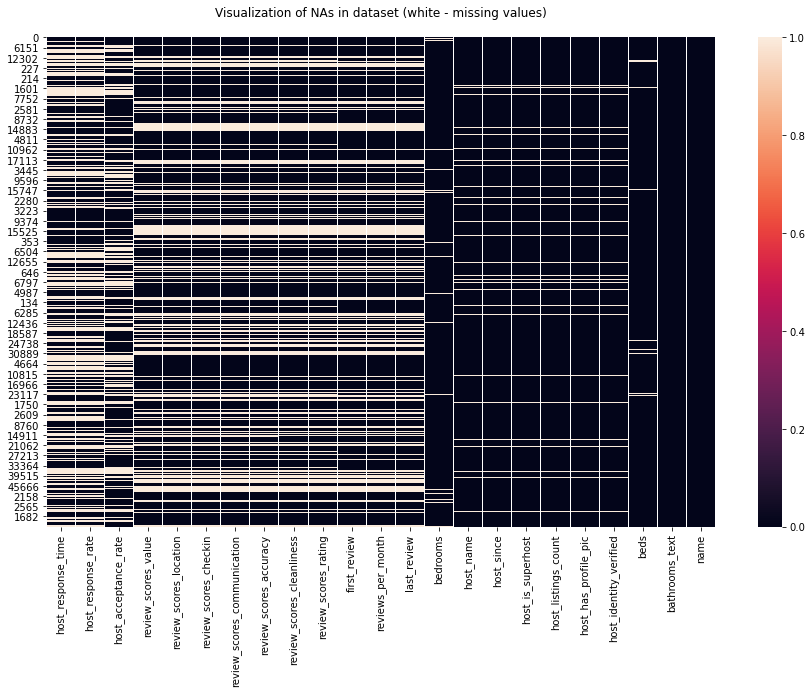

In [172]:
#plt.figure(figsize=(15,9))
sns.heatmap(df[missing_df.query('Total > 0').index].isna()); # selecting only those variables which contain any missings
plt.title('Visualization of NAs in dataset (white - missing values)\n');

In [8]:
cols_missing=['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','bedrooms', 'beds','bathrooms_text', 'host_listings_count', 'name', 'first_review', 'last_review']
df = df.dropna(subset=cols_missing).reset_index(drop=True)

In [9]:
# usuniecie $ i konwersja price na typ numeryczny
df['price'] = df['price'].apply(lambda x: x[1:].replace(',','')).astype(float)

In [10]:
%%time
# bathrooms
df['bathrooms_type'] = 'private'
df['bathrooms'] = 0.0
for i, val in df.iterrows():
    if ('shared' in df.iat[i,19]) or ('Shared' in df.iat[i,19]):
        df.iat[i,42] = 'shared'
    if ('half-bath' in df.iat[i,19]) or ('Half-bath' in df.iat[i,19]):
        df.iat[i,43] = 0.5
    first_word = df.iat[i,19].split(' ', 1)[0]
    if len(first_word) <= 4:
        df.iat[i,43] = float(first_word)
df['bathrooms_text'] = df['bathrooms_type']

Wall time: 20.3 s


In [11]:
df = df.drop('bathrooms_type', axis=1).rename(columns={'bathrooms_text':'bathrooms_type'})

In [12]:
# beds
df['bedrooms'] = df.bedrooms.astype(int)
df['beds'] = df.beds.astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188437 entries, 0 to 188436
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           188437 non-null  object 
 1   scrape_id                    188437 non-null  object 
 2   last_scraped                 188437 non-null  object 
 3   name                         188437 non-null  object 
 4   host_id                      188437 non-null  object 
 5   host_name                    188437 non-null  object 
 6   host_since                   188437 non-null  object 
 7   host_response_time           127480 non-null  object 
 8   host_response_rate           127480 non-null  object 
 9   host_acceptance_rate         144752 non-null  object 
 10  host_is_superhost            188437 non-null  object 
 11  host_listings_count          188437 non-null  float64
 12  host_has_profile_pic         188437 non-null  object 
 13 

## Conversion

In [14]:
date_cols=['last_scraped', 'first_review','last_review', 'host_since']
for col in date_cols:
    df[col]=pd.to_datetime(df[col])

In [15]:
int_cols=['id', 'host_id', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
          'review_scores_communication', 'review_scores_location', 'review_scores_value', 'host_listings_count',
         'minimum_nights', 'maximum_nights', 'accommodates', 'availability_365', 'number_of_reviews', ]

In [16]:
for col in int_cols:
    df[col]=df[col].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188437 entries, 0 to 188436
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           188437 non-null  int32         
 1   scrape_id                    188437 non-null  object        
 2   last_scraped                 188437 non-null  datetime64[ns]
 3   name                         188437 non-null  object        
 4   host_id                      188437 non-null  int32         
 5   host_name                    188437 non-null  object        
 6   host_since                   188437 non-null  datetime64[ns]
 7   host_response_time           127480 non-null  object        
 8   host_response_rate           127480 non-null  object        
 9   host_acceptance_rate         144752 non-null  object        
 10  host_is_superhost            188437 non-null  object        
 11  host_listings_count       

In [19]:
df.shape

(188437, 43)

In [20]:
df.to_csv('airbnb_data.csv', sep=';')

In [21]:
df.to_csv('airbnb_data_coma.csv', sep=',')